## Importing Libraries

In [60]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

##  Loading Sparsed Data

In [61]:
PerreoRockCorridos = pd.read_csv('PerreoRockCorridos_sparsed.csv')

In [62]:
# copying data to another variable to avoid any changes to original data
data = PerreoRockCorridos.copy()

## Overview of the Data

In [63]:
data.shape

(1754, 15)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist_name     1754 non-null   object 
 1   danceability      1754 non-null   float64
 2   energy            1754 non-null   float64
 3   key               1754 non-null   int64  
 4   loudness          1754 non-null   float64
 5   mode              1754 non-null   int64  
 6   speechiness       1754 non-null   float64
 7   acousticness      1754 non-null   float64
 8   instrumentalness  1754 non-null   float64
 9   liveness          1754 non-null   float64
 10  valence           1754 non-null   float64
 11  tempo             1754 non-null   float64
 12  genre             1754 non-null   int64  
 13  beats             1754 non-null   int64  
 14  segments          1754 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 205.7+ KB


In [65]:
# checking for duplicate values
data.duplicated().sum()

192

In [66]:
data = data.drop_duplicates()

In [67]:
data.duplicated().sum()

0

In [68]:
data.isnull().sum()

playlist_name       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
beats               0
segments            0
dtype: int64

In [69]:
# Print the cumulative percentage of each genre
cumper_regeatonrockcorridos = data['genre'].value_counts(1).cumsum()

# Print the cumulative percentage of each genre
print(cumper_regeatonrockcorridos)

cumper_regeatonrockcorridos.to_csv('cumper_regeatonrockcorridos.csv')

64     0.144046
196    0.269526
29     0.354673
135    0.393726
8      0.425736
         ...   
172    0.997439
30     0.998079
168    0.998720
56     0.999360
16     1.000000
Name: genre, Length: 225, dtype: float64


<Axes: >

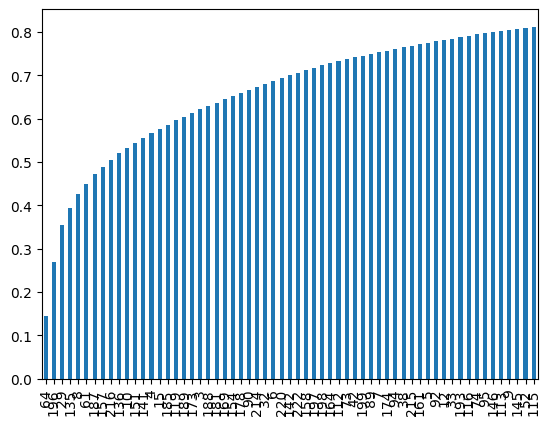

In [70]:
data['genre'].value_counts(1).cumsum().sort_values(ascending=True)[0:61].plot(kind='bar')

In [71]:
# create a boolean mask for the top 61 genres
top_genres = data['genre'].value_counts(1).cumsum().sort_values(ascending=True)[0:61].index.tolist()
mask = data['genre'].isin(top_genres)

In [72]:
data.shape

(1562, 15)

In [73]:
data.head()

playlist_name  danceability  energy  key  loudness  mode  speechiness  \
0      Regeaton         0.846   0.552    5    -8.873     1       0.0400   
1      Regeaton         0.812   0.479    2    -5.678     0       0.3330   
2      Regeaton         0.859   0.658   11    -4.790     1       0.1590   
3      Regeaton         0.691   0.765    8    -4.727     1       0.1110   
4      Regeaton         0.834   0.828   11    -2.660     0       0.0452   

   acousticness  instrumentalness  liveness  valence    tempo  genre  beats  \
0         0.361          0.000000    0.0816    0.396  105.004    216    312   
1         0.213          0.000001    0.0756    0.559  169.922     61    645   
2         0.145          0.000000    0.1200    0.672  100.065    196    323   
3         0.464          0.000003    0.2030    0.855  174.021    187    707   
4         0.210          0.000006    0.1030    0.580  102.025    216    332   

   segments  
0       659  
1       938  
2       862  
3      1057  
4       843

In [74]:
data.describe().T

count        mean         std         min        25%  \
danceability      1562.0    0.671627    0.153051    0.163000    0.56700   
energy            1562.0    0.732623    0.143688    0.084200    0.64825   
key               1562.0    5.569142    3.422149    0.000000    2.00000   
loudness          1562.0   -5.447207    2.092229  -15.520000   -6.40775   
mode              1562.0    0.603713    0.489282    0.000000    0.00000   
speechiness       1562.0    0.095313    0.078457    0.025400    0.04450   
acousticness      1562.0    0.213326    0.214602    0.000005    0.02320   
instrumentalness  1562.0    0.019174    0.102044    0.000000    0.00000   
liveness          1562.0    0.180555    0.133458    0.019900    0.09100   
valence           1562.0    0.644017    0.225841    0.058600    0.47425   
tempo             1562.0  124.106279   31.322982   59.972000   96.99075   
genre             1562.0  111.424456   70.069150    0.000000   61.00000   
beats             1562.0  407.101793  150.435228  132.000000  301.25000   
segments          1562.0  806.176056  213.287030  316.000000  663.25000   

                         50%        75%       max  
danceability        0.704500    0.79075     0.967  
energy              0.748000    0.83900     0.996  
key                 6.000000    8.00000    11.000  
loudness           -5.119000   -4.05825    -0.484  
mode                1.000000    1.00000     1.000  
speechiness         0.066400    0.11500     0.591  
acousticness        0.145000    0.34500     0.982  
instrumentalness    0.000002    0.00016     0.946  
liveness            0.126000    0.25000     0.882  
valence             0.671000    0.83100     0.996  
tempo             115.077000  149.34450   214.025  
genre             115.500000  187.00000   224.000  
beats             368.000000  481.75000  1381.000  
segments          779.000000  906.75000  2448.000

c:\Users\carlo\Desktop\Data Projects\InnerOut Proyect\Features_Spotify\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


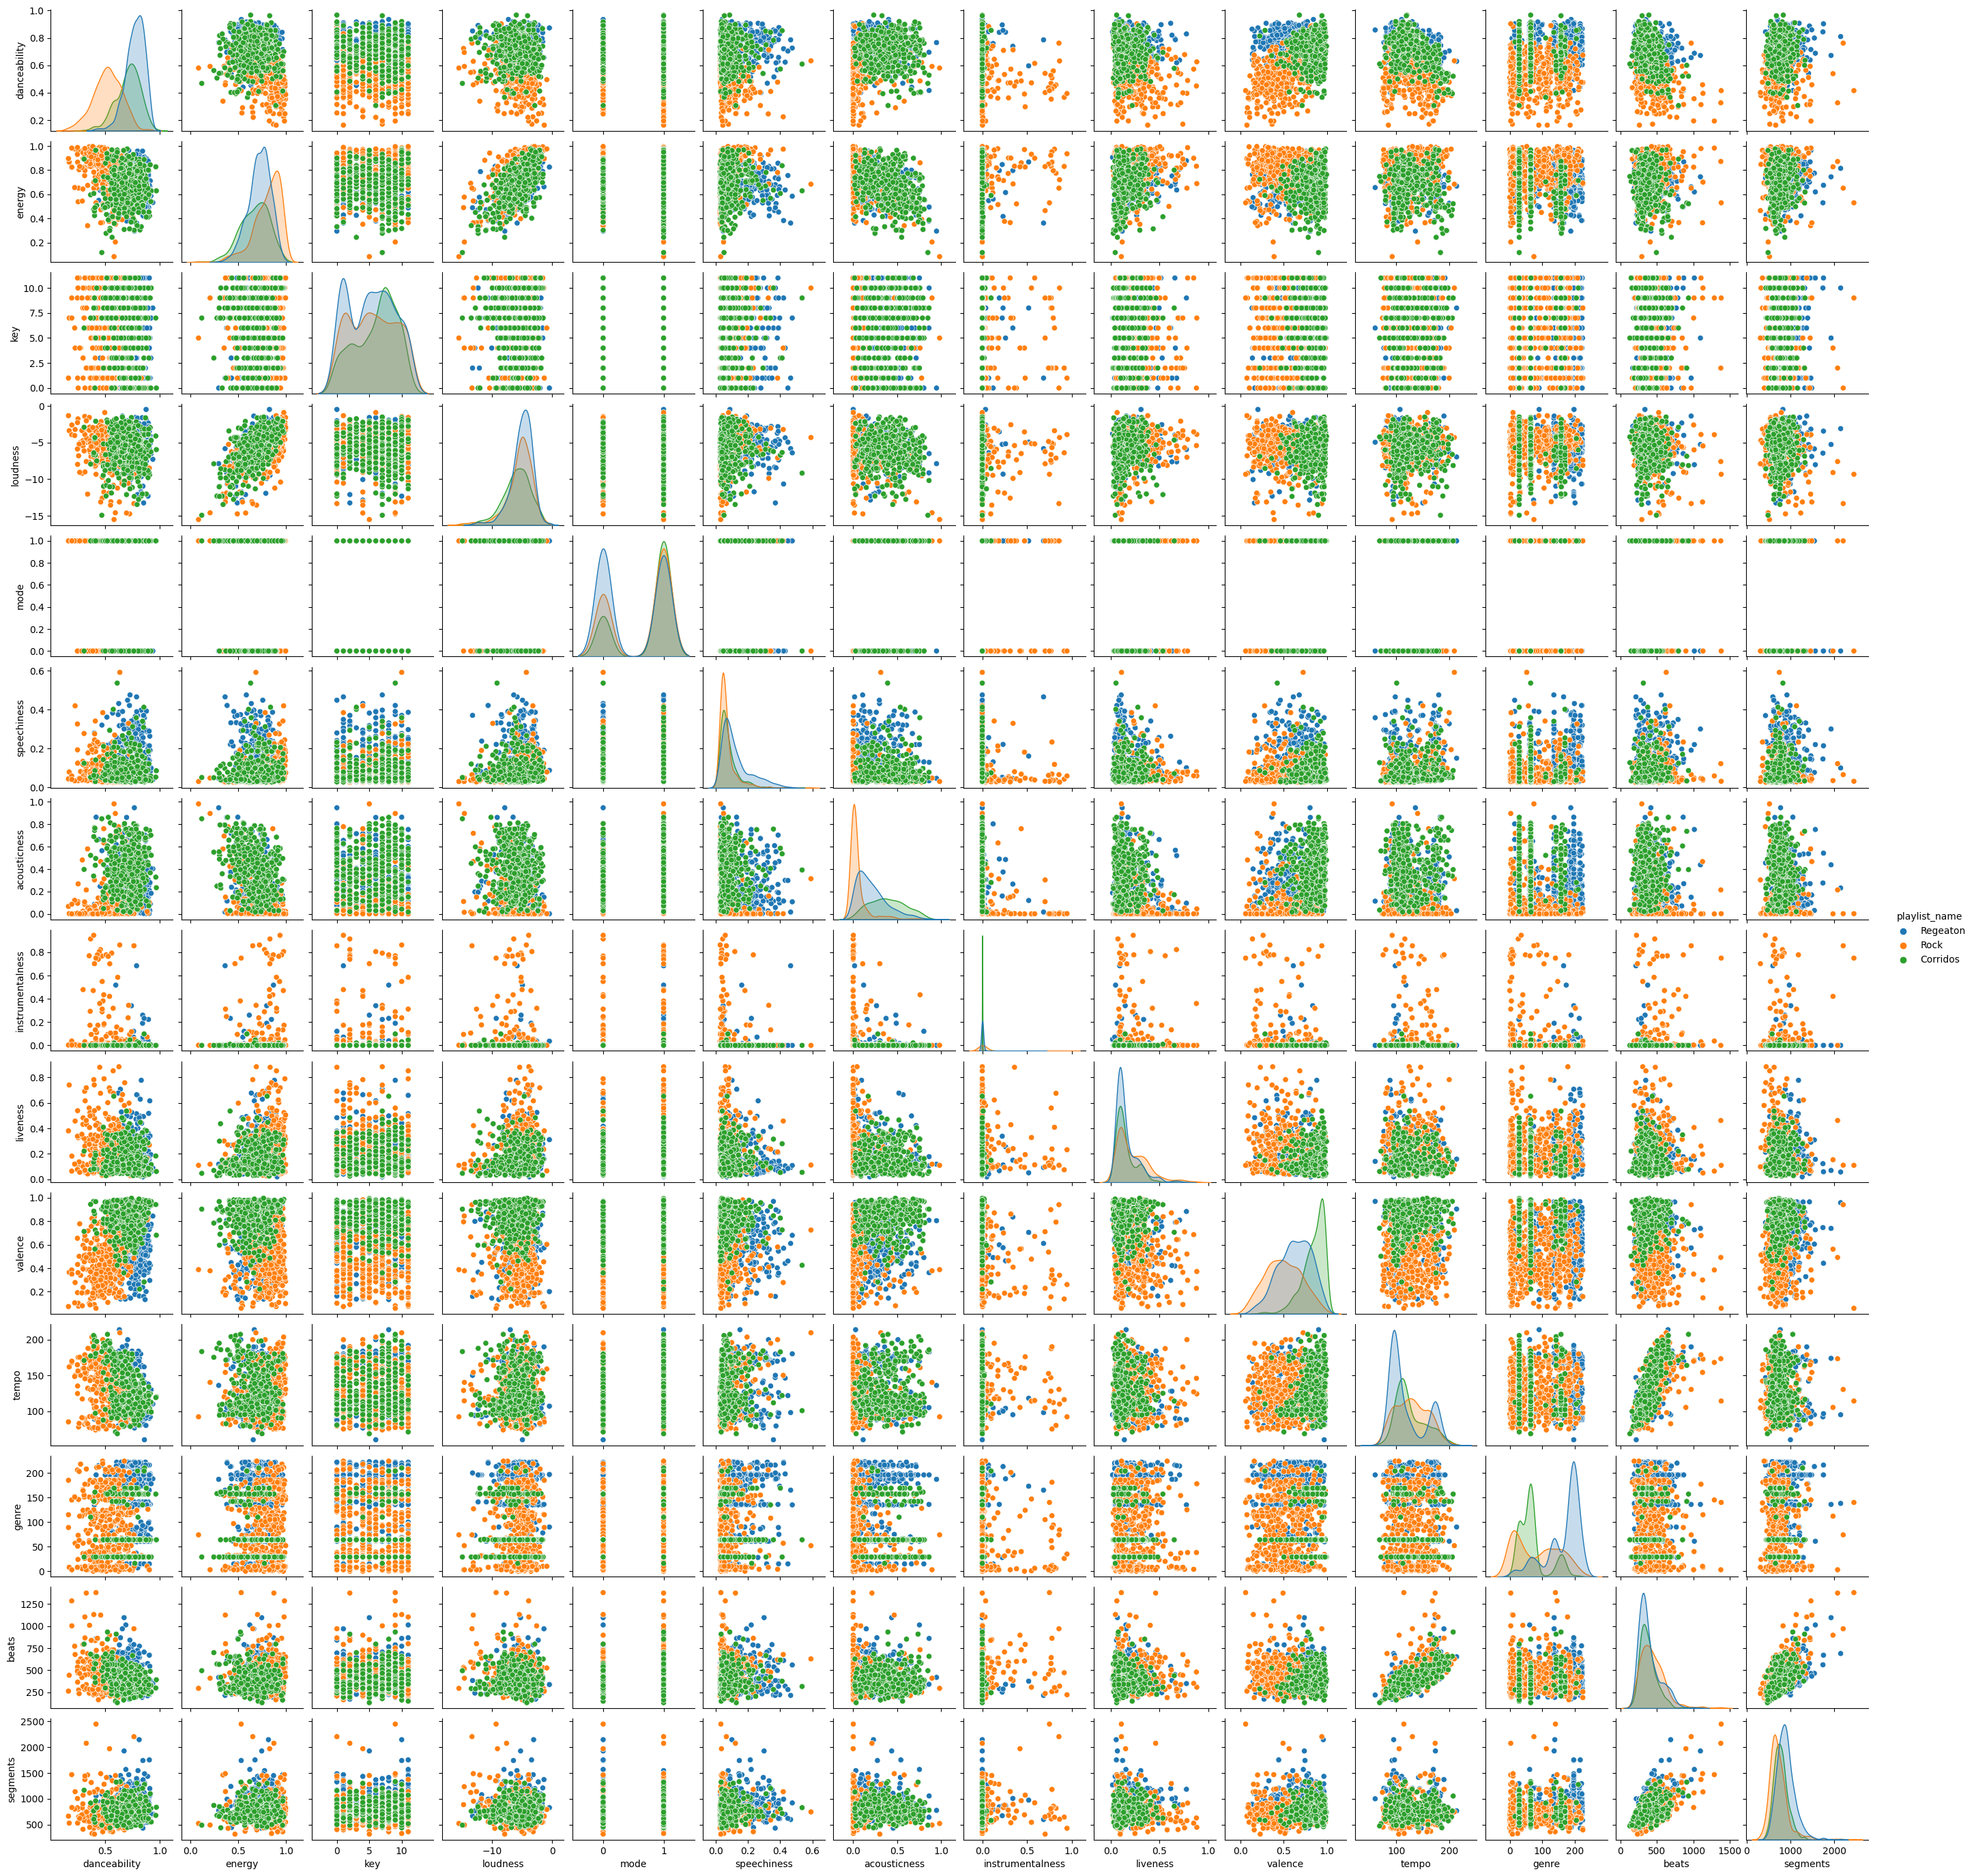

In [75]:
sns.pairplot(data, hue='playlist_name', size=2)

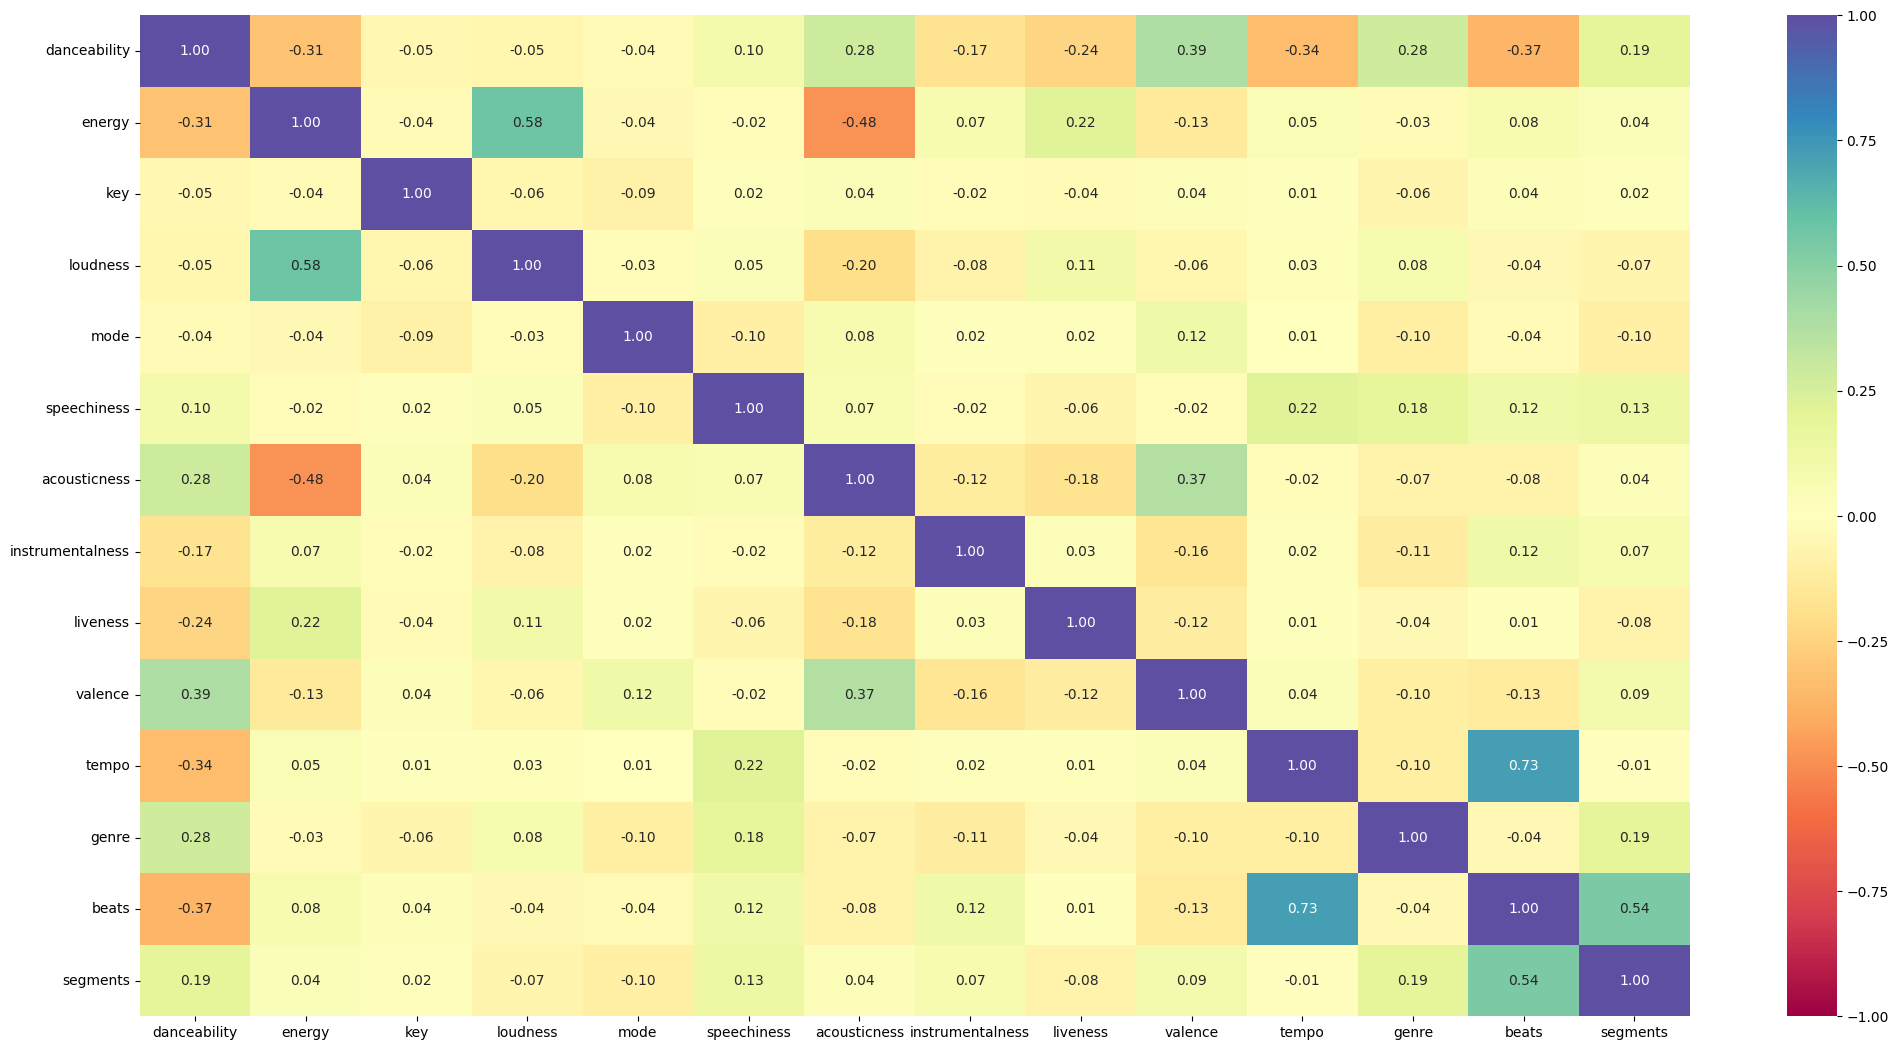

In [76]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(25, 13))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing Scaling

In [77]:
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [78]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
target_variable = "playlist_name"

In [79]:
# scaling the data before Modeling
scaler = StandardScaler()
numeric_data = data[numeric_columns].copy()
numeric_data_scaled = scaler.fit_transform(numeric_data)

In [80]:
data_scaled = data.copy()
data_scaled[numeric_columns] = numeric_data_scaled

In [81]:
data = data_scaled

In [82]:
data.head()

playlist_name  danceability    energy       key  loudness      mode  \
0      Regeaton      1.139683 -1.257457 -0.166365 -1.637914  0.810195   
1      Regeaton      0.917463 -1.765666 -1.043287 -0.110345 -1.234271   
2      Regeaton      1.224650 -0.519509  1.587481  0.314219  0.810195   
3      Regeaton      0.126621  0.225401  0.710558  0.344340  0.810195   
4      Regeaton      1.061253  0.663993  1.587481  1.332598 -1.234271   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0    -0.705239      0.688351         -0.187964 -0.741708 -1.098547 -0.610044   
1     3.030479     -0.001518         -0.187952 -0.786681 -0.376569  1.463156   
2     0.811998     -0.318485         -0.187964 -0.453886  0.123943 -0.767774   
3     0.200003      1.168463         -0.187932  0.168232  0.934508  1.594060   
4    -0.638939     -0.015502         -0.187906 -0.581307 -0.283554 -0.705180   

      genre     beats  segments  
0  1.492940 -0.632380 -0.690259  
1 -0.719869  1.581906  0.618257  
2  1.207416 -0.559236  0.261815  
3  1.078931  1.994176  1.176369  
4  1.492940 -0.499390  0.172705

## Data Preparation for Modeling

In [91]:
#Importing Necesary Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from functools import partial

In [92]:
# load dataset
dataset = data.values
X = dataset[:, 1:].astype(float)
y = dataset[:, 0]
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = to_categorical(y)
print(X.shape)
print(y.shape) 

(1562, 14)
(1562, 3)


In [93]:
from sklearn.model_selection import train_test_split

# split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split train set into train and validation sets (75/25 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# print the shapes of the resulting sets
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (936, 14) (936, 3)
Validation set: (313, 14) (313, 3)
Test set: (313, 14) (313, 3)


## Data Modeling

In [94]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(64, input_dim=14, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
# fit the model to the training data
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy*100))

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 0.7143 - accuracy: 0.7486 - val_loss: 2.0185 - val_accuracy: 0.0000e+00
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8623 - val_loss: 1.5181 - val_accuracy: 0.1949
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8983 - val_loss: 1.1829 - val_accuracy: 0.4665
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9183 - val_loss: 1.0264 - val_accuracy: 0.5751
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9207 - val_loss: 0.9840 - val_accuracy: 0.6166
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9295 - val_loss: 0.8592 - val_accuracy: 0.6518
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9359 - val_loss: 0.7697 - val_accuracy: 0.7029
Epoch 8/50
40/40

10/10 [==============================] - 0s 908us/step


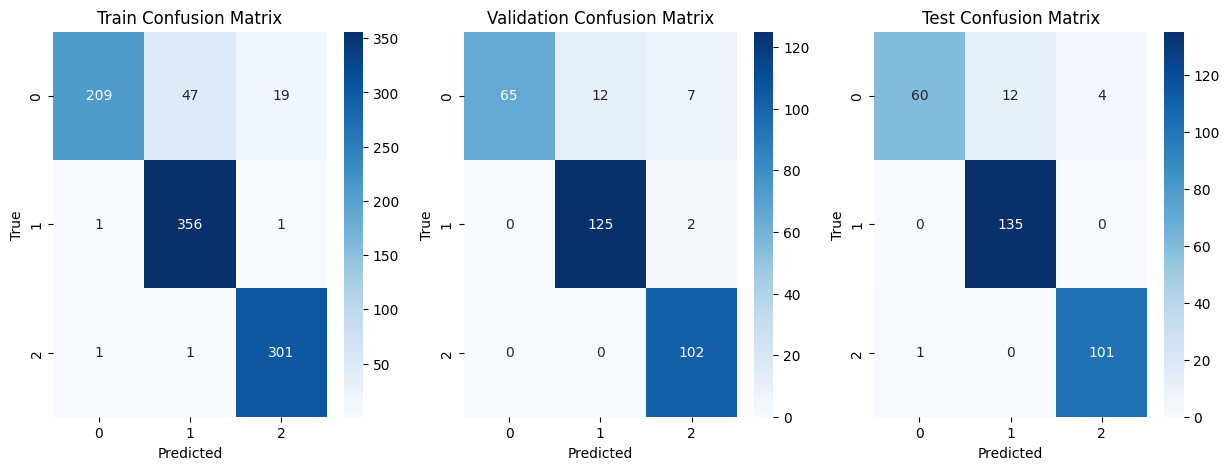

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# get the predicted classes for the train set
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_train_orig = np.argmax(y_train, axis=-1)
cm_train = confusion_matrix(y_train_orig, y_train_pred)

# get the predicted classes for the validation set
y_val_pred = np.argmax(model.predict(X_val), axis=-1)
y_val_orig = np.argmax(y_val, axis=-1)
cm_val = confusion_matrix(y_val_orig, y_val_pred)

# get the predicted classes for the test set
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_orig = np.argmax(y_test, axis=-1)
cm_test = confusion_matrix(y_test_orig, y_test_pred)

# create subplots for the confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot the train set confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
axs[0].set_title('Train Confusion Matrix')

# plot the validation set confusion matrix
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
axs[1].set_title('Validation Confusion Matrix')

# plot the test set confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')
axs[2].set_title('Test Confusion Matrix')

# show the plot
plt.show()

## Hyperparameter Tunning Keras Model 

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the Keras model with specified hyperparameters
def create_model(num_hidden_layers=2, hidden_layer_size=32, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=14, activation=activation))
    for i in range(num_hidden_layers-1):
        model.add(Dense(hidden_layer_size, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier object from the model function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'hidden_layer_size': [32, 64, 128],
    'activation': ['relu', 'sigmoid']
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train_one_hot)

# Print the best hyperparameters and accuracy
print('Best parameters:', grid_result.best_params_)
print('Best accuracy:', grid_result.best_score_)

C:\Users\carlo\AppData\Local\Temp\ipykernel_15608\2355525079.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best parameters: {'activation': 'relu', 'hidden_layer_size': 128, 'num_hidden_layers': 1}
Best accuracy: 0.8867521286010742


## Best Model with Best Parameters

In [100]:
# Create the model with the best parameters
model = create_model()

# Train the model on the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 0.5686 - accuracy: 0.7906 - val_loss: 0.3458 - val_accuracy: 0.8690
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2934 - accuracy: 0.8985 - val_loss: 0.3004 - val_accuracy: 0.8882
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.9092 - val_loss: 0.2944 - val_accuracy: 0.8914
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9156 - val_loss: 0.2970 - val_accuracy: 0.8978
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2003 - accuracy: 0.9263 - val_loss: 0.3065 - val_accuracy: 0.9169
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1933 - accuracy: 0.9263 - val_loss: 0.3038 - val_accuracy: 0.9010
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1726 - accuracy: 0.9348 - val_loss: 0.3006 - val_accuracy: 0.9105
Epoch 8/50
15/15 [=

10/10 [==============================] - 0s 795us/step


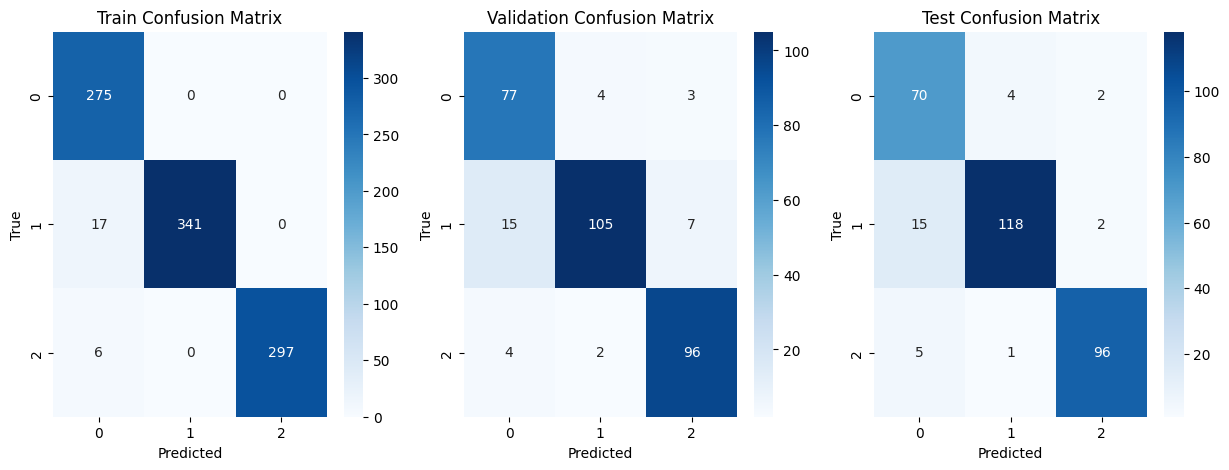

In [103]:
# Get the predicted classes for the train set
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_train_orig = np.argmax(y_train, axis=-1)
cm_train = confusion_matrix(y_train_orig, y_train_pred)

# Get the predicted classes for the validation set
y_val_pred = np.argmax(model.predict(X_val), axis=-1)
y_val_orig = np.argmax(y_val, axis=-1)
cm_val = confusion_matrix(y_val_orig, y_val_pred)

# Get the predicted classes for the test set
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_orig = np.argmax(y_test, axis=-1)
cm_test = confusion_matrix(y_test_orig, y_test_pred)

# Create subplots for the confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the train set confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
axs[0].set_title('Train Confusion Matrix')

# Plot the validation set confusion matrix
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
axs[1].set_title('Validation Confusion Matrix')

# Plot the test set confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')
axs[2].set_title('Test Confusion Matrix')

# Show the plot
plt.show()